<div style="border:solid Chocolate 2px; padding: 40px">

<b> Евгений, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [1]:
!pip install phik -q
!pip install lightgbm -q

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from phik.report import plot_correlation_matrix
from phik import report
from datetime import datetime

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import mean_squared_error, make_scorer

# импортируем класс RandomizedSearchCV и GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

## Загрузка данных и первичный анализ

In [3]:
df_path = 'https://code.s3.yandex.net/datasets/autos.csv'

In [4]:
try:
    df = pd.read_csv(df_path)
except:
    print('Проверьте путь к датасету')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Спасибо за рекомендацию! Но наверно это только для локальной работы? Или библиотека `os` позволяет работать с файлом из сети? Просто я использую адрес `https://code.s3.yandex.net/datasets/autos.csv`
</div>
    

In [5]:
def primary_information(df):
    """Вывод общей информации о датасете"""
    print(f"Размерность: {df.shape}")
    display(df.info())
    display(df.head())

In [6]:
def pass_value_barh(df):
    """Вывод графика с количеством пропущенных значений"""
    try:
        ax = (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        )
        ax.set_xlabel("Пропущенные значения, %", fontsize = 16, color = 'SteelBlue')
        ax.set_ylabel("Поле", fontsize = 16, color = 'SteelBlue')
        ax.set_title('Процент пропущенных значений' + "\n", fontsize = 22, color = 'SteelBlue')
    except:
        print('Пропусков нет')

Выведем общую информацию о датасете

In [7]:
primary_information(df)

Размерность: (354369, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object

None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Первичный осмотр данных выполнен.

Приведем даты к типу datetime

In [8]:
df['DateCrawled'] = pd.to_datetime(
    df['DateCrawled'], format="%Y-%m-%d"
)
df['DateCreated'] = pd.to_datetime(
    df['DateCreated'], format="%Y-%m-%d"
)
df['LastSeen'] = pd.to_datetime(
    df['LastSeen'], format="%Y-%m-%d"
)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Даты приведены к нужному типу.

Проверим датасет наналичие пропущенных значений

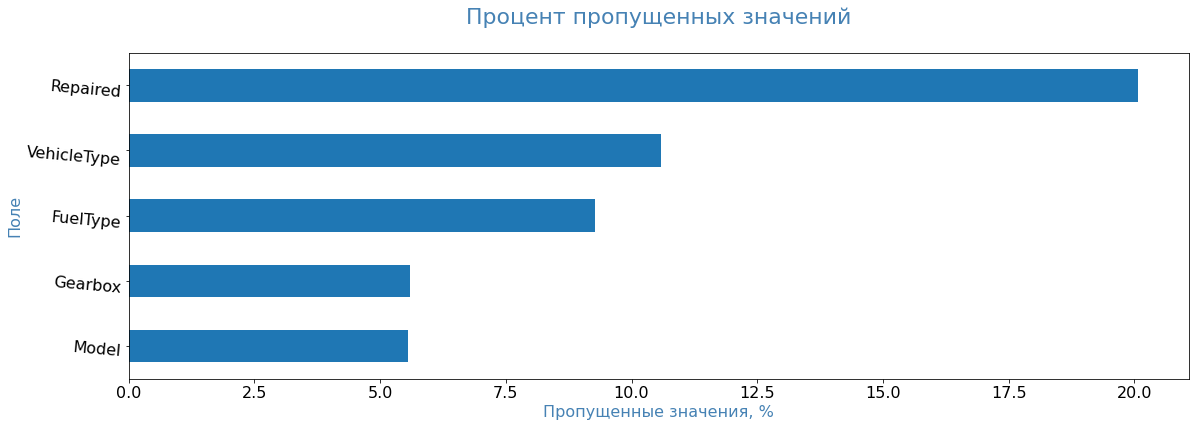

In [9]:
pass_value_barh(df)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не забывай подписывать оси на графиках.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Сделал 👍
</div>

Проверим датасет на наличие дубликатов

In [10]:
df[df.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


Посмотрим количество уникальных значений в каждом поле

In [11]:
df.nunique().sort_values(ascending=False)

DateCrawled          271174
LastSeen             179150
PostalCode             8143
Price                  3731
Power                   712
Model                   250
RegistrationYear        151
DateCreated             109
Brand                    40
Kilometer                13
RegistrationMonth        13
VehicleType               8
FuelType                  7
Gearbox                   2
Repaired                  2
NumberOfPictures          1
dtype: int64

### Промежуточный вывод
Был успешно выгружен датасет, содержащий более 350'000 строк и 16 признаков:
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя
- `Price` — цена (евро)

Первичный анализ показал, что датасет:
- имеет пропущенные значения в следующих полях:
    - `VehicleType`
    - `Gearbox`
    - `Model`
    - `FuelType`
    - `Repaired`
- содержит 4 полных дубликата
- содержит неинформативный признак `NumberOfPictures` с единственным уникальным значением

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что не забываешь про промежуточные выводы.

## Предобработка данных

Объявим функции, необходимые для анализа:

In [12]:
def draw_boxplots(df, cols, title):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 4))
    for i in range(len(cols)):
        sns.boxplot(data = df, y=cols[i], ax=axs[i])
        axs[i].set_xlabel(cols[i])
        axs[i].set_ylabel('')
    fig.suptitle(title, fontsize=30);

In [83]:
def draw_hists(df, cols, title):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 4))
    for i in range(len(cols)):
        df[cols[i]].hist(ax=axs[i])
        axs[i].set_xlabel(cols[i])
        axs[i].set_ylabel('')
    fig.suptitle(title, fontsize=30);
    return fig, axs

In [14]:
def draw_barh(df, col, title):
    (
        df[col]
        .value_counts(ascending=True)
        .plot(kind = 'barh', figsize = (20,10), legend = False, fontsize = 16)
        .set_title('Распределение по брендам' + "\n", fontsize = 22, color = 'SteelBlue')
    )

In [15]:
def get_top_df(df, col, qty, include_others):
    df1 = df[col].value_counts(ascending=True).to_frame()
    df2 = df1[-qty:].copy()
    if include_others & (len(df1) > qty):
        df2.loc['others'] = [df1[col][:-qty].sum()]    
    return df2

In [16]:
def show_pie(df, columns, column_titles, main_title):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), sharey=True, figsize=(18, 6))
    if len(columns) == 1:
        (
            df[columns[0]].value_counts().plot.pie(autopct='%1.f%%', legend=False,
                wedgeprops = {"edgecolor" : "white", 
                              'linewidth': 2, 
                              'antialiased': True})
        )
        axes.title.set_text(column_titles[0])
    else:
        idx = 0
        for column in columns:    
            (
                df[column].value_counts().plot.pie(ax=axes[idx], autopct='%1.f%%', legend=False,
                    wedgeprops = {"edgecolor" : "white", 
                                  'linewidth': 2, 
                                  'antialiased': True})
            )
            axes[idx].title.set_text(column_titles[idx])
            idx+=1
    fig.suptitle(main_title, fontsize=30)

In [74]:
def draw_countplots(df, cols, title):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 6))
    for i in range(len(cols)):
        sns.countplot(data = df, y=cols[i], ax=axs[i])
        axs[i].set_xlabel(cols[i])
        axs[i].set_ylabel('')
    fig.suptitle(title, fontsize=30);
    return fig, axs

Разделим признаки на количественные и категориальные:

In [18]:
num_columns = ['Power', 'Kilometer', 'RegistrationYear', 'RegistrationMonth']
cat_columns = ['Model', 'PostalCode', 'Brand', 'VehicleType', 'FuelType', 'Gearbox', 'Repaired']
target = ['Price']

Удалим дубликаты

In [19]:
df.drop_duplicates(ignore_index=True, inplace=True)

(<Figure size 1152x288 with 2 Axes>,
 array([<Axes: xlabel='Power'>, <Axes: xlabel='Price'>], dtype=object))

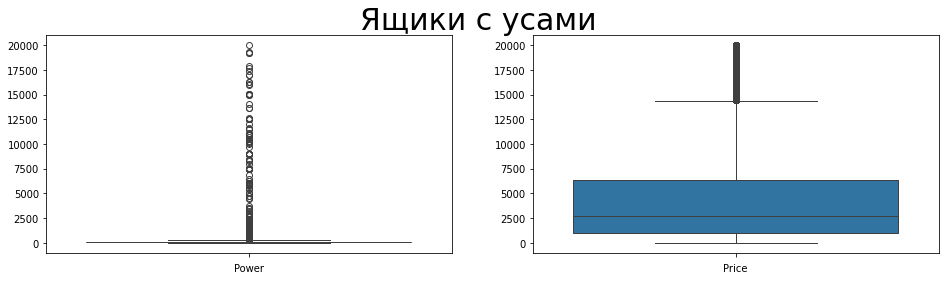

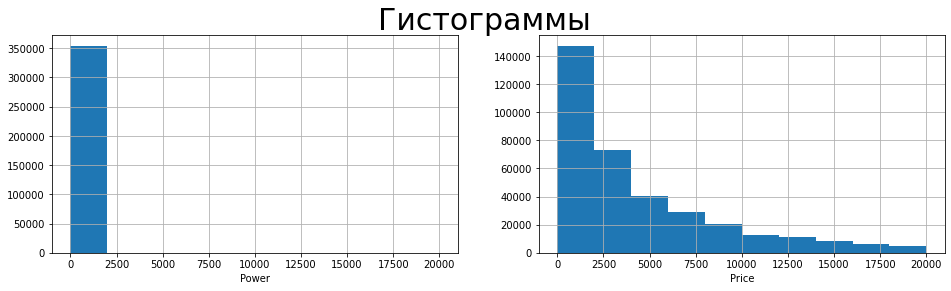

In [93]:
draw_boxplots(
    df, 
    ['Power', 'Price'], 
    "Ящики с усами"
)
draw_hists(
    df, 
    ['Power', 'Price'], 
    "Гистограммы"
)

(111.0, 75.0)

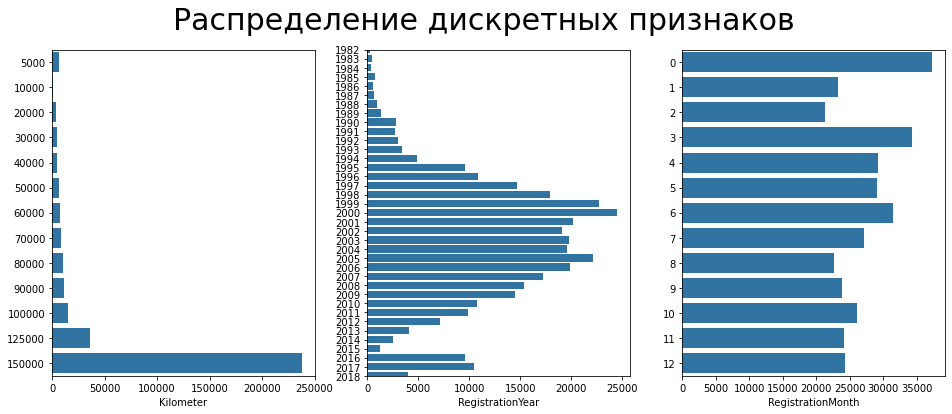

In [94]:
fig, axs = draw_countplots(
    df, 
    ['Kilometer', 'RegistrationYear', 'RegistrationMonth'], 
    "Распределение дискретных признаков"
)
axs[1].set_ylim(111, 75)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. Аналогично не забывай подписывать оси и названия на графиках.
    
2. `Kilometer`, `RegistrationMonth` и `RegistrationYear` - дискретные признаки, для их анализа нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать `sns.countplot`. Для этих признаков также не нужно строить ящики с усами, так как признак имеет, скорее, распределение категориального признака, пусть и представленного уже в численном виде.

На изображнных диаграммах видны аномальные значения:
- `Price` — присутствуют объявления с подозрительно низкой ценой, вплоть до 0
- `RegistrationYear` — год регистрации автомобиля превышает текущий год
- `Power` — мощность, указанная в некоторых анкетах, выходит за рамки разумных значений
- `RegistrationMonth` — диапазон в поле месяца регистрации автомобиля содержит 13 значений

Устраним найденные аномалии:

In [95]:
df.drop(df[(df['Price'] < 500)].index, inplace = True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалены околонулевые цены.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить неадекватно низкие значения цен: в пределах цен до 500-1000 евро вряд ли можно купить полноценный автомобиль.

In [96]:
df.drop(df[(df['RegistrationYear'] > df['DateCrawled'].dt.year) | (df['RegistrationYear'] < 1950)].index, inplace = True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По году регистрации фильтрация в порядке.

In [98]:
df.drop(df[(df['Power'] > 500) | (df['Power'] < 50)].index, inplace = True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалены аномальные значения мощности.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить околонулевые значения мощности - некоторые значения этого признака в таблице напоминают, скорее, телегу с конём, чем автомобиль:)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Обязательно нужно удалить нулевые значения мощности.

In [99]:
df.loc[(df['RegistrationMonth'] == 0), 'RegistrationMonth'] = 1

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что обработал эту аномалию.

(<Figure size 1152x288 with 2 Axes>,
 array([<Axes: xlabel='Power'>, <Axes: xlabel='Price'>], dtype=object))

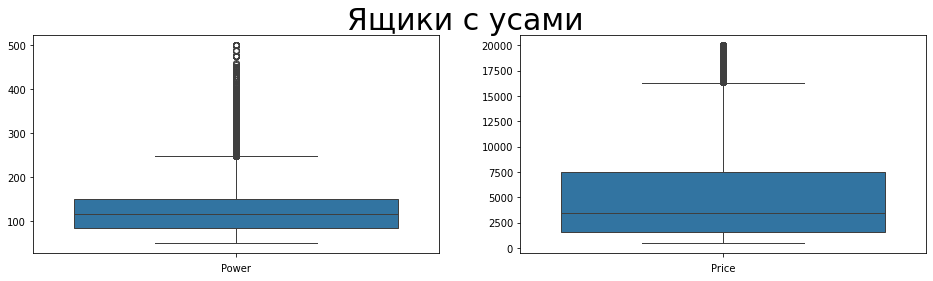

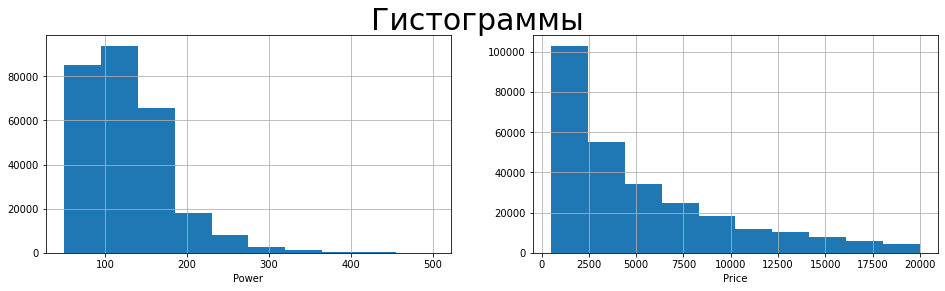

In [101]:
draw_boxplots(
    df, 
    ['Power', 'Price'], 
    "Ящики с усами"
)
draw_hists(
    df, 
    ['Power', 'Price'], 
    "Гистограммы"
)

(67.0, 30.0)

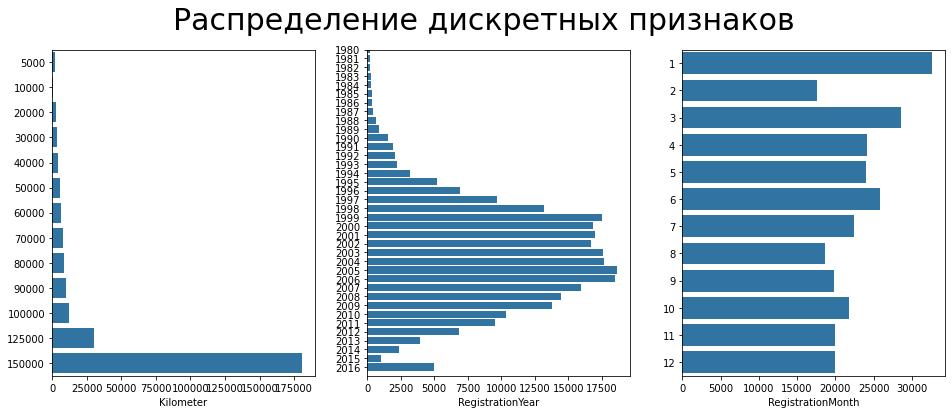

In [111]:
fig, axs = draw_countplots(
    df, 
    ['Kilometer', 'RegistrationYear', 'RegistrationMonth'], 
    "Распределение дискретных признаков"
)
axs[1].set_ylim(67, 30)

Перейдем к категориальным переменным

Text(0.5, 1.0, 'Распределение по брендам\n')

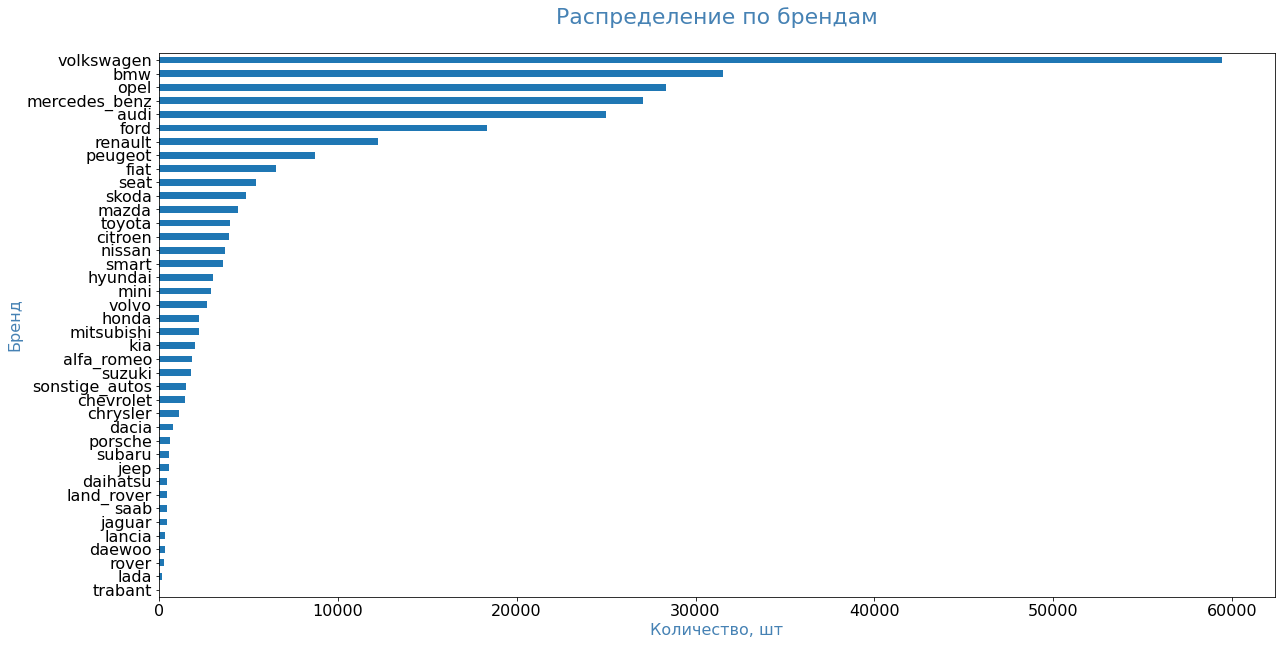

In [117]:
ax = (
    get_top_df(df, 'Brand', 40, False)
        .plot(kind = 'barh', figsize = (20,10), legend = False, fontsize = 16, xlabel='Бренд', ylabel='')
);
ax.set_xlabel("Количество, шт", fontsize = 16, color = 'SteelBlue')
ax.set_ylabel("Бренд", fontsize = 16, color = 'SteelBlue')
ax.set_title('Распределение по брендам' + "\n", fontsize = 22, color = 'SteelBlue')

Text(0.5, 1.0, 'Распределение по моделям\n')

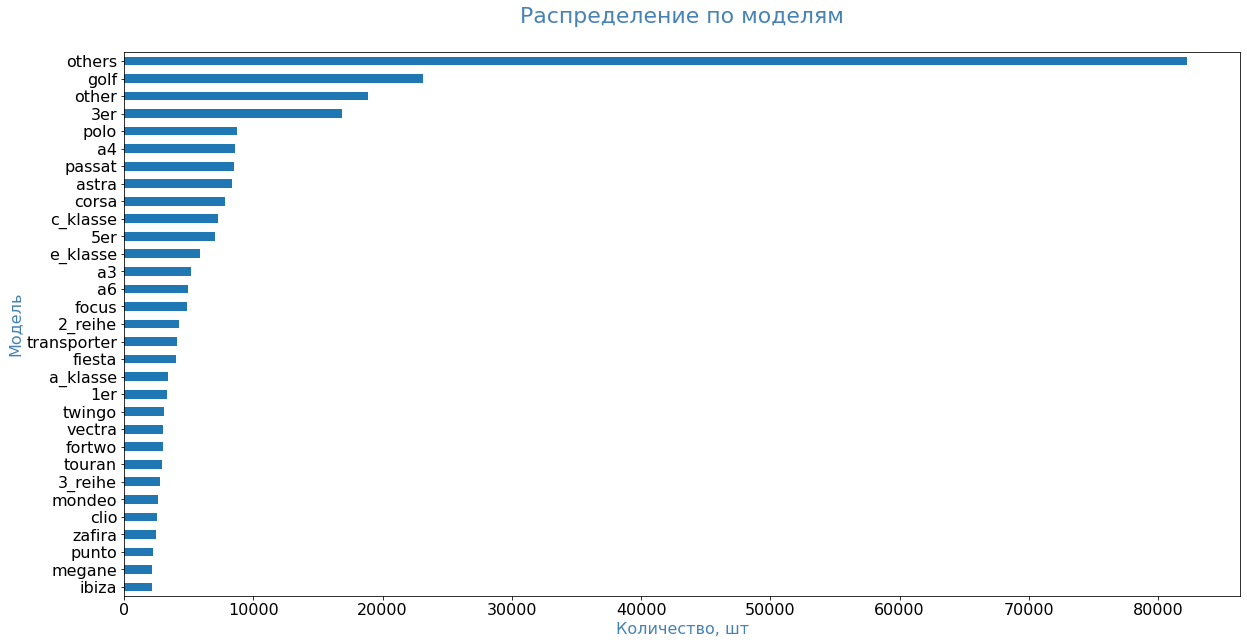

In [120]:
ax = (
    get_top_df(df, 'Model', 30, True)
        .plot(kind = 'barh', figsize = (20,10), legend = False, fontsize = 16, xlabel='Модель')
);
ax.set_xlabel("Количество, шт", fontsize = 16, color = 'SteelBlue')
ax.set_ylabel("Модель", fontsize = 16, color = 'SteelBlue')
ax.set_title('Распределение по моделям' + "\n", fontsize = 22, color = 'SteelBlue')

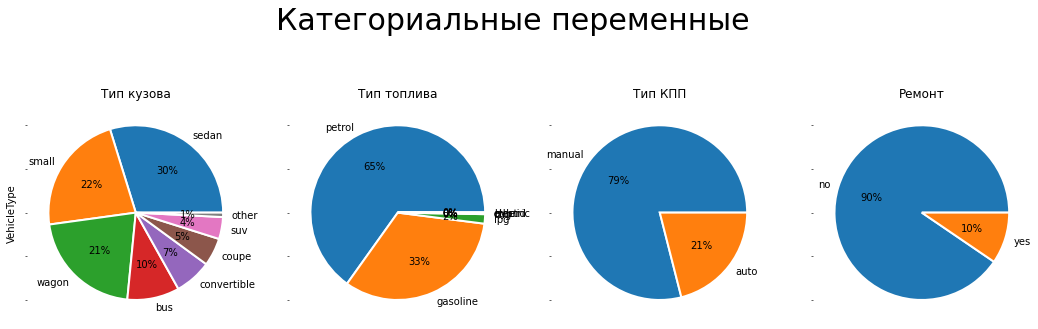

In [114]:
show_pie(df, 
         ['VehicleType', 'FuelType', 'Gearbox', 'Repaired'], 
         ['Тип кузова', 'Тип топлива', 'Тип КПП', 'Ремонт'], 
         "Категориальные переменные")

Text(0.5, 1.0, 'Тип топлива\n')

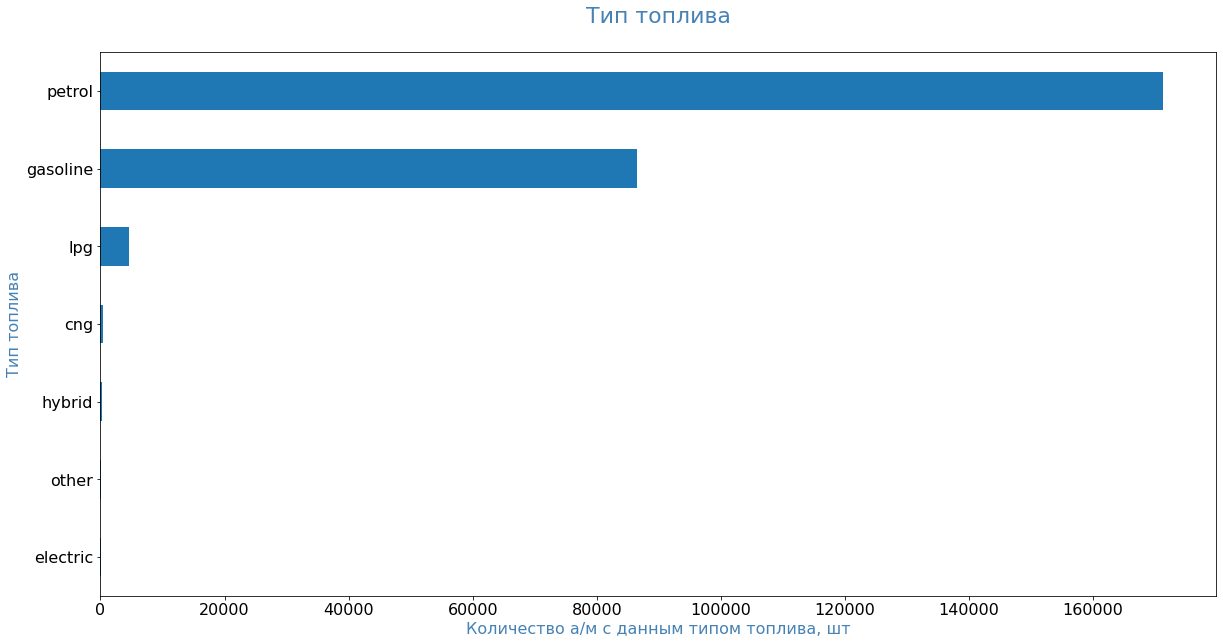

In [122]:
ax = (
    get_top_df(df, 'FuelType', 0, False)
        .plot(kind = 'barh', figsize = (20,10), legend = False, fontsize = 16, xlabel='Тип топлива')
);
ax.set_xlabel("Количество а/м с данным типом топлива, шт", fontsize = 16, color = 'SteelBlue')
ax.set_ylabel("Тип топлива", fontsize = 16, color = 'SteelBlue')
ax.set_title('Тип топлива' + "\n", fontsize = 22, color = 'SteelBlue')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> На группе этих гистограмм также нужно подписать ось X.

Заполним пропуски в данных следующим образом:
- в полях `VehicleType`, `Model`, `FuelType` пропуски объединим с категорией `other`
- в полях `Gearbox` и `Repaired` для пропусков создадим категорию `unknown`

In [123]:
df['VehicleType'].fillna(value='other', inplace=True)
df['Model'].fillna(value='other', inplace=True)
df['FuelType'].fillna(value='other', inplace=True)
df['Gearbox'].fillna(value='unknown', inplace=True)
df['Repaired'].fillna(value='unknown', inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Отличное решение по обработке пропусков в категориальных признаках заглушкой - это позволит как сохранить наблюдения вместо их удаления, так и избавит нас от возможных ошибок при эмпирическом импутировании.

Создадим синтетический признак `CarAge` - возраст машины

In [124]:
df['CarAge'] = df['DateCrawled'].dt.year - df['RegistrationYear']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Полезный признак.

Определим информативные признаки:

In [125]:
num_columns = ['Power', 'Kilometer', 'CarAge']
cat_columns = ['Model', 'PostalCode', 'Brand', 'VehicleType', 'FuelType', 'Gearbox', 'Repaired']
target = ['Price']

Построим матрицу корреляций

In [126]:
phik_overview = df[num_columns + cat_columns + target].sample(1000).phik_matrix(
    interval_cols=['Power', 'CarAge']
)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
`Kilometer` - дискректный признак, его не нужно передавать в `interval_cols`.

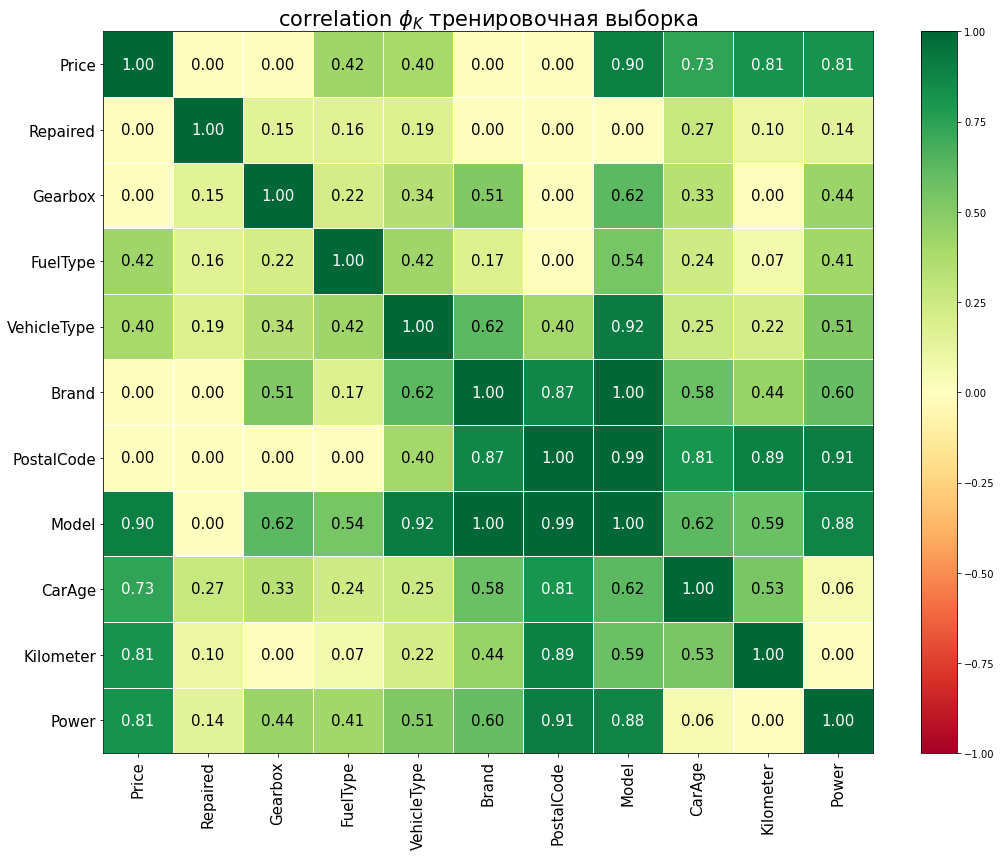

In [127]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$ тренировочная выборка",
    fontsize_factor=1.5,
    figsize=(15, 12)
);

Набор выбранных признаков обладает мультиколлинеарностью. Чтобы избежать этого исключим из набора поле `Model`

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Есть анализ корреляции - молодец, что используешь `phik` для анализа и нелинейных зависимостей, а также настраиваешь `interval_cols` для корректной оценки корреляции для переменных разного типа.

Определим набор признаков, который будет использоваться при обучении моделей:

In [134]:
num_columns = ['Power', 'Kilometer', 'CarAge']
cat_columns = ['Brand', 'VehicleType', 'FuelType', 'Gearbox', 'Repaired']
target = ['Price']

Проверим данные на дубликаты:

In [139]:
df[df[num_columns + cat_columns + target].duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,CarAge


In [138]:
df.drop(df[df[num_columns + cat_columns + target].duplicated()].index, inplace = True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. Важен ли для ценообразования признак `PostalCode`? Он показывает нам регион регистрации владельца авто - это не говорит нам о регионе сделки, к тому же люди часто не живут по адресу регистрации.
    
2. Так как мы удалили часть лишних признаков, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии таблицы.

## Обучение моделей

Зафиксируем константы

In [140]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Создадим метрику RMSE

In [141]:
def rmse_score(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print('RMSE: %2.2f' % rmse)
    return rmse

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть пользовательский скорринг для кросс-валидации - отлично! В целом `make_scorer` не нужен, потому что метрика `RMSE` входит в базовый пакет метрик `sklearn`, поэтому в `scoring` можно передать строковое обозначение `RMSE`, которое выглядит как `neg_root_mean_squared_error`.

In [142]:
X = df[num_columns + cat_columns]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175020, 8), (58340, 8), (175020, 1), (58340, 1))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сплитование выполнено верно.

In [157]:
cat_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('cat',  OneHotEncoder(drop = 'first', sparse_output = False)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для линейной модели `OrdinalEncoder` можно использовать только в отношении упорядоченных признаков - в нашем датасете таких нет, так как среди выделенных признаков нельзя уверенно сказать, что какое-то значеие лучше или хуже другого. В таких случаях выбор техники кодирования стоит делать исходя из особенностей модели:
    
- для линейной модели - `OneHotEncoder`, так как линейные модели легко работают с матрицами высокой размерности;
- для нелинейной модели - предпочительнее `OrdinalEncoder`, так как матрицы высокой размерности снижают производительность этих моделей, однако можно использовать и `OneHotEncoder`, а также их сочетание.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
    
Выбрал `OrdinalEncoder` потому что включил в список признаков `PostalCode`, предполагая, что место регистрации несет в себе полезную информацию о цене. При кодировании с помощью `OneHotEncoder` получалось большое количество полей, что приводило к нехватке памяти. Поэтому решил использовать `OrdinalEncoder` и задействовать деревянные модели и градиентый бустинг. Вот такая цепочка размышлений была 😅
</div>

In [161]:
data_preprocessor = ColumnTransformer(
    [('cat', cat_pipe, cat_columns),
     ('num', StandardScaler(), num_columns),
    ], 
    remainder='passthrough'
)

In [162]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [163]:
param_grid = [
    # словарь для модели LinearRegression() 
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    # словарь для модели DecisionTreeRegressor() 
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [7, 10],
        'models__min_samples_split': [2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    # словарь для модели RandomForestRegressor() 
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler()]
    },
    # словарь для модели LGBMRegressor()
    {
        'models': [lgb.LGBMRegressor(random_state=RANDOM_STATE)],
        'models__num_leaves': [31, 47],
        'models__n_estimators': [100, 200],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }
]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

При использовании моделей (кроме линейной регрессии) важно настроить параметр `random_state`, чтобы результаты работы над проектом были воспроизводимы при его перезапуске.

In [164]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=None
)
grid_search.fit(X_train, y_train.values.ravel())

print('Лучшая модель DecisionTreeRegressor и её параметры:\n\n', grid_search.best_estimator_)

RMSE: 2789.84
RMSE: 2779.70
RMSE: 2779.89
RMSE: 2813.35
RMSE: 2817.31
RMSE: 2789.84
RMSE: 2779.70
RMSE: 2779.89
RMSE: 2813.35
RMSE: 2817.31
RMSE: 2261.88
RMSE: 2224.92
RMSE: 2233.74
RMSE: 2265.37
RMSE: 2273.60
RMSE: 2262.19
RMSE: 2224.92
RMSE: 2233.74
RMSE: 2265.37
RMSE: 2273.60
RMSE: 2261.88
RMSE: 2224.92
RMSE: 2233.74
RMSE: 2265.37
RMSE: 2273.60
RMSE: 2262.19
RMSE: 2224.92
RMSE: 2233.74
RMSE: 2265.37
RMSE: 2273.60
RMSE: 2036.38
RMSE: 2039.01
RMSE: 2022.13
RMSE: 2066.24
RMSE: 2065.86
RMSE: 2036.70
RMSE: 2039.10
RMSE: 2021.76
RMSE: 2066.73
RMSE: 2065.90
RMSE: 2034.95
RMSE: 2038.69
RMSE: 2021.19
RMSE: 2065.71
RMSE: 2065.42
RMSE: 2035.28
RMSE: 2038.79
RMSE: 2020.94
RMSE: 2066.41
RMSE: 2065.47
RMSE: 1742.96
RMSE: 1727.45
RMSE: 1719.41
RMSE: 1751.57
RMSE: 1741.65
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data po

RMSE: 1728.65
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 140016, number of used features: 57
[LightGBM] [Info] Start training from score 5314.041067
RMSE: 1719.15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 140016, number of used features: 57
[LightGBM] [Info] Start training from score 5309.056801
RMSE: 1699.87
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

RMSE: 1695.20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 140016, number of used features: 57
[LightGBM] [Info] Start training from score 5314.041067
RMSE: 1685.70
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 175020, number of used features: 58
[LightGBM] [Info] Start training from score 5310.949686
Лучшая модель DecisionTreeRegressor и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
       

Время обучения одной модели - 53s / 40 = 1.33s

## Анализ моделей

In [ ]:
%%time
y_test_pred = tree_grid.predict(X_test)
tree_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Метрика RMSE на тестовой выборке лечшей модели DecisionTreeRegressor: {tree_rmse:0.0f}")

In [ ]:
%%time
y_test_pred = forest_grid.predict(X_test)
forest_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Метрика RMSE на тестовой выборке лечшей модели RandomForestRegressor: {forest_rmse:0.0f}")

In [ ]:
%%time
y_test_pred = lgbm_grid.predict(X_test)
lgbm_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Метрика RMSE на тестовой выборке лечшей модели LGBMRegressor: {lgbm_rmse:0.0f}")

# Вывод

В ходе работы был успешно выгружен датасет, содержащий более 350'000 строк и 16 признаков. Анализ показал, что датасет имеет пропущенные значения, содержит полные дубликаты и неинформативные признаки. Также были обнаружены и устранены аномальные значения. В ходе отбора признаков была обнаружена мультиколлинеарность. Для ее устранения из набора было исключено поле `Model`
Далее были обучены три модели `DecisionTreeRegressor`, `RandomForestRegressor` и `LGBMRegressor` с разными гиперпараметрами. Анализ результатов работы этих моделей прведен в таблице:

|                        | RMSE         | Время обучения | Время предсказания |
|------------------------|--------------|----------------|--------------------|
| DecisionTreeRegressor  | 2007         | 1 s            | 185 ms             |
| RandomForestRegressor  | 1635         | 1min 11 s      | 2.95 s             |
| LGBMRegressor          | 1658         | 1.33 s         | 341 ms             |

На основании критериев, которые важны заказчику, а именно:
 - качество предсказания
 - время обучения модели
 - время предсказания модели

можно сделать вывод, что оптимальным выбором будет модель градиентного бустинга. Она обладает хорошим качеством, небольшим временем предсказания и высокой скоростью обучения.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
Концепт для `valid`:
    
    for ... in ...:
    
        #код для поиска лучшей модели
    
    model = ... #код для инициализации лучшей модели с оптимальными гиперпараметрами
    
    model.fit(X_train, Y_train) #замеряем время обучения
    
    pred = model.predict(X_valid) #замеряем время предсказания
    
    RMSE = (Y_valid, pred) #замеряем RMSE на valid
    
Концепт для кросс-валидации:
    
    model = #инициализируем модель
    gs = GridSearchCV(...) #настраиваем поиск по сетке
    
    gs.fit(...) #находим лучшую модель
    
    gs.best_score_ #замеряем RMSE на  кросс-валидации
    
    model = gs.best_estimator_ #получаем лучшую модель из best_estimator
    model = #YourModel(random_state = 42, **gs.best_params) #альтернативный способ получения лучшей модели
    
    model.fit(X_train, Y_train) #замеряем время обучения
    model.predict(X_train) #замеряем время предсказания
    
    
   По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
   Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды
    
 Альтернативный подход - использование `cv_results_` после обучения `GridSearchCV` в качестве источика метрик (особенно удобно в случае рассмотрения нескольких моделей в пределах одного `Pipeline`). В таком случае можно выполнить группировку по столбцу с названием модели (предварительно извлечь его можно с помощью строкового метода `split()`), найти индексы строк с минимальным значением метрики, и уже из этих строк извлечь время обучения (`mean_fit_time`) и время предсказания (`mean_score_time`).
    
3. Итоговый вывод нужно поправить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Евгений, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны почти все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных.
    
Работа с моделями также выполнена неплохо: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)